# Лабораторная работа №306
## Температурная зависимость намагниченности

In [1]:
d = 20.2 # мм 
D = 29.8 # мм
h = 5.2 # мм
R1 = 62 # Ом
R2 = 25 # кОм
N1 = 300
N2 = 400
C = 2 # мкФ
Cx = 0.17 # В/дел
Cy = 0.02 # В/дел
S = h*(D-d)

### Упражнение 1. Получение петли гистерзиса и определение магнитных параметров образца при комнатной температуре

![glisteresis](C:\Users\дмитрий\Desktop\306\glisteresis.png)

Здесь:  
Hc = ОА - коэрцитивная сила  
Hs = OB - насыщающее поле  
Br = OC - остаточная индукция  
Bs = OD - индукция насыщения  

Рассчитаем значения коэрцитивной силы $H_c$, насыщающего поля $H_s$, остаточной индукции $B_r$, индукции насыщения образца $B_s$ по формулам:  
$$H=\frac{n_1C_xx}{R_1}$$  
$$B=\frac{R_2CC_yy}{N_2S_{obr}}$$  

Измеренные вкличины:


In [2]:
import pandas as pd
OA = 13 #дел
OB = 19 #дел
OC = 16 #дел
OD = 20 #дел
Sx = 0.05 #дел
Sy = 0.5 #дел
Hc = N1 * Cx * OA / R1 # А/м
HC = [Hc]
Hs = N1 * Cx * OB / R1 # А/м
HS = [Hs]
Br = 1000 * R2 * C * Cy * OC / (N2 * S) # Тл
BR = [Br]
Bs = 1000 * R2 * C * Cy * OD / (N2 * S) # Тл
BS = [Bs]
#Погрешности
SHc = 10 *  N1 * Cx * Sx / R1
SHs = SHc 
SBr = 1000 * R2 * C * Cy * Sy / (N2 * S)
SBs = SBr
SHC = [SHc]
SHS = [SHs]
SBR = [SBr]
SBS = [SBs]
data = pd.DataFrame({'Hc' : HC, 'Hs' : HS, 'Br' : BR, 'Bs' : BS}) 
data1 = pd.DataFrame({'\u00B1 SHc' : SHC,'    ' '\u00B1 SHs' : SHS, '    ' '\u00B1 SBr' : SBR, '   ''\u00B1 SBs' : SBS})
print(data, '\n', data1)


          Hc         Hs        Br        Bs
0  10.693548  15.629032  0.801282  1.001603 
      ± SHc      ± SHs      ± SBr     ± SBs
0  0.41129    0.41129    0.02504   0.02504


## Упражнение 2. Измерение зависимости индукции насыщения ферромагнитного образца от температуры и определение точки Кюри

Построить график зависимости $B_s$ от температуры $T$. Определить точку Кюри $T_c$.    

Запишем результаты измерения для температуры $T$ и $OD$.

In [3]:
import numpy as np
T = np.array([20, 30, 40, 48, 56, 70, 80, 90, 100, 105, 110, 115, 120, 125, 130, 132, 135, 138, 140]) 
sig_T = 0.5 #К
T += 273 # К
OD_arr = np.array([20, 18, 17.5, 16.5, 16, 15, 14, 13, 11.5, 10.5, 9.5, 7.5, 5.5, 3.5, 1.5, 0.5, 0.2, 0.1, 0])
OD_sig = 1 # дел
Bs_arr = 1000 * R2 * C * Cy * OD_arr / (N2 * S) # Тл
Bs_sig = R2 * C * Cy * Sy / (N2 * S)
data = pd.DataFrame({'T' : T, 'sig_T' : sig_T, 'Bs' : Bs_arr, 'sig_Bs' : Bs_sig})
print(data)

      T  sig_T        Bs    sig_Bs
0   293    0.5  1.001603  0.000025
1   303    0.5  0.901442  0.000025
2   313    0.5  0.876402  0.000025
3   321    0.5  0.826322  0.000025
4   329    0.5  0.801282  0.000025
5   343    0.5  0.751202  0.000025
6   353    0.5  0.701122  0.000025
7   363    0.5  0.651042  0.000025
8   373    0.5  0.575921  0.000025
9   378    0.5  0.525841  0.000025
10  383    0.5  0.475761  0.000025
11  388    0.5  0.375601  0.000025
12  393    0.5  0.275441  0.000025
13  398    0.5  0.175280  0.000025
14  403    0.5  0.075120  0.000025
15  405    0.5  0.025040  0.000025
16  408    0.5  0.010016  0.000025
17  411    0.5  0.005008  0.000025
18  413    0.5  0.000000  0.000025


Построим график зависимости $B_s = f(T)$

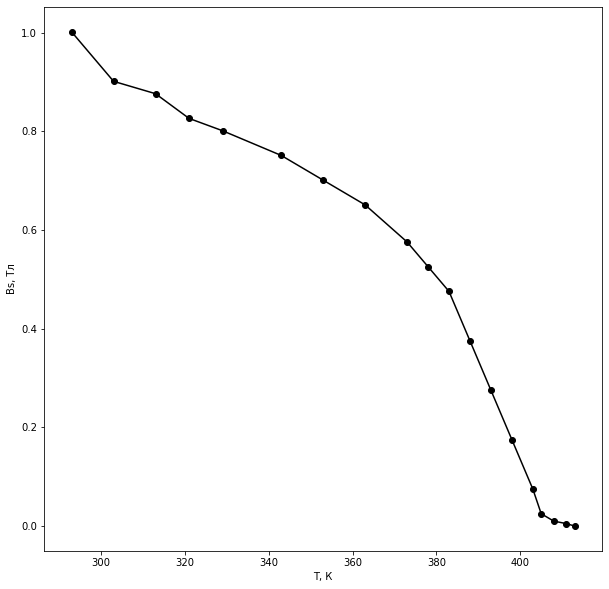

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.errorbar(T, Bs_arr, xerr=sig_T, yerr=Bs_sig, color='black', fmt='-o')
plt.ylabel('Bs, Тл', color='black')
plt.xlabel('T, К', color='black')
plt.show()

### МНК:

In [5]:
from numpy import linalg as LA
Bs_mnk = Bs_arr[13:16]
T_mnk = T[13:16]
A = np.vstack([T_mnk, np.ones(len(T_mnk))]).T
a, b = np.linalg.lstsq(A, Bs_mnk, rcond=None)[0]
print(f'a = {a} Тл/К, b = {b} Тл/К')

a = -0.02118774654832347 Тл/К, b = 8.609287680802103 Тл/К


Формула температуры Кюри:
$$T_c=\frac{b}{a}$$

In [15]:
Tc = np.abs(b / a) - 273
print('Tc =',Tc,'градусов C')

Tc = 133.33333333333331 K


# Основные итоги работы
Для комнатной температуры были получены значения коэрцитивной силы $H_c$, насыщающего поля $H_s$, остаточной индукции $B_r$ и индукции насыщения $B_s$:  
$$H_c = 10.6 +- 0.41 (В/см)$$
$$H_s = 15.5 +- 0.41 (В/см)$$ 
$$B_r = 0.4 +- 0.025 (В/см)$$
$$B_s = 0.5 +- 0.025 (В/см)$$  
При температуре Кюри феромагнетик становится парамагнетиком $T_c = (133,3 +- 0,5)(C)$